In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic dataset
data, _ = make_blobs(n_samples=2000, centers=4, cluster_std=0.6, random_state=42)

In [2]:
class KMeans:
    def __init__(
        self,
        max_iter: int,
        cluster_number: int,
        tol: float = 1e-5,
        random_seed: bool = True
    ):
        self.max_iter = max_iter
        self.k = cluster_number
        self.tol = tol
        self.random_seed = random_seed

    def assign_cluster(self, data):
        '''
        Calculate the Euclidean distances between a point and all centers and return label according to min distince
        '''
        distence = np.linalg.norm(data[:, np.newaxis] - self.centroid, axis=2)
        return np.argmin(distence, axis=1)
    
    def fit(self, data):
        '''
        Perform K-Means clustering.
        '''

        if self.random_seed:
            np.random.seed(41)

        # Initialize centers randomly
        random_idx = np.random.permutation(data.shape[0])[:self.k]
        self.centroid = data[random_idx]
        self.centroids = [self.centroid.copy()]

        for itr in range(self.max_iter):
            # Assign each data point to the closest center
            self.labels = self.assign_cluster(data)

            # Save previous centroids
            previous_centroids = self.centroid
            
            # Update centers
            self.centroid = np.array(list(map(lambda x: data[self.labels==x].mean(axis=0), range(self.k))))

            # Check if centroids have stopped moving beyond the tolerance
            new_prev_diff = np.linalg.norm(previous_centroids - self.centroid, axis=1)
            self.centroids.append(self.centroid.copy())
            if np.all(new_prev_diff) < self.tol:
                print(f'onverged after {itr+1} iterations')
                break

In [3]:
kmeans = KMeans(100, 4)
kmeans.fit(data)

onverged after 2 iterations


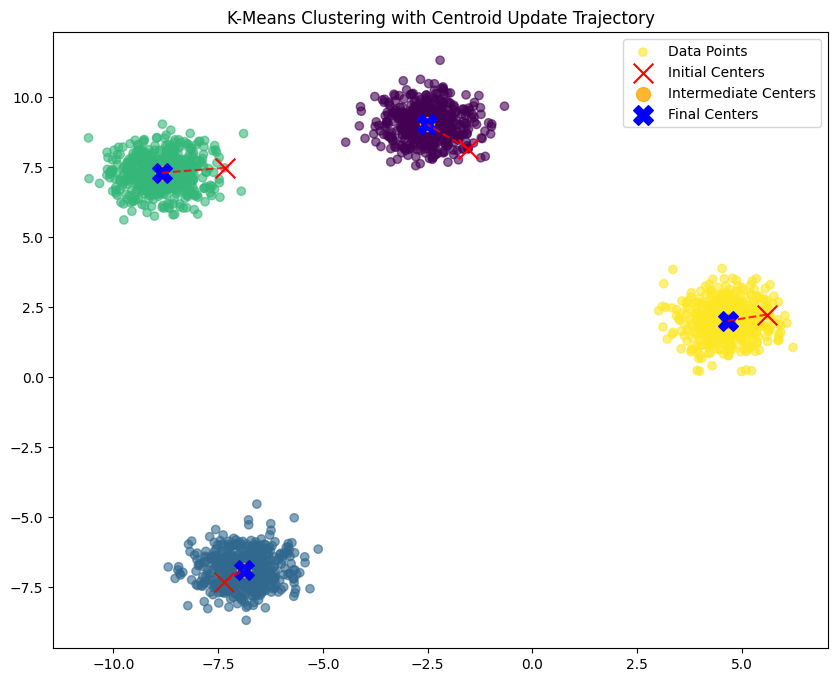

In [4]:
# Plot the result with trajectory
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels, cmap='viridis', alpha=0.6, label='Data Points')
plt.scatter(kmeans.centroids[0][:, 0], kmeans.centroids[0][:, 1], c='red', marker='x', s=200, label='Initial Centers')

# Plot the centroid update trajectory
for t in range(len(kmeans.centroids) - 1):
    for i in range(kmeans.k):
        plt.plot(
            [kmeans.centroids[t][i, 0], kmeans.centroids[t + 1][i, 0]],
            [kmeans.centroids[t][i, 1], kmeans.centroids[t + 1][i, 1]],
            'r--',
            alpha=0.8,
        )
    plt.scatter(
        kmeans.centroids[t + 1][:, 0], kmeans.centroids[t + 1][:, 1], c='orange', marker='o', s=100, alpha=0.8, label='Intermediate Centers' if t == 0 else ""
    )

plt.scatter(kmeans.centroid[:, 0], kmeans.centroid[:, 1], c='blue', marker='X', s=200, label='Final Centers')
plt.title(f'K-Means Clustering with Centroid Update Trajectory')
plt.legend()
plt.show()